# Transfer Learning with InceptionV3

In [1]:
!gdown "https://drive.google.com/uc?id=1dIxJQ8G5GlxV5tb3meBk88QC6gk-rpzC" -O dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1dIxJQ8G5GlxV5tb3meBk88QC6gk-rpzC
To: /content/dataset.zip
100% 1.40G/1.40G [00:33<00:00, 41.5MB/s]


In [2]:
# download test dataset
!gdown "https://drive.google.com/uc?id=1eoluKNqVtkLqM2dxaGFAwjkO1J0WorI0" -O test.zip

Downloading...
From: https://drive.google.com/uc?id=1eoluKNqVtkLqM2dxaGFAwjkO1J0WorI0
To: /content/test.zip
100% 4.01M/4.01M [00:00<00:00, 190MB/s]


In [3]:
!unzip dataset.zip -d dataset
!unzip test.zip -d test

Streaming output truncated to the last 5000 lines.
  inflating: dataset/e_kettle/Bing_0333.webp  
  inflating: dataset/e_kettle/Bing_0334.jpeg  
  inflating: dataset/e_kettle/Bing_0335.jpeg  
  inflating: dataset/e_kettle/Bing_0336.jpeg  
  inflating: dataset/e_kettle/Bing_0338.jpeg  
  inflating: dataset/e_kettle/Bing_0339.jpeg  
  inflating: dataset/e_kettle/Bing_0341.jpeg  
  inflating: dataset/e_kettle/Bing_0343.jpeg  
  inflating: dataset/e_kettle/Bing_0344.jpeg  
  inflating: dataset/e_kettle/Bing_0350.jpeg  
  inflating: dataset/e_kettle/Bing_0352.jpeg  
  inflating: dataset/e_kettle/Bing_0354.jpeg  
  inflating: dataset/e_kettle/Bing_0355.jpeg  
  inflating: dataset/e_kettle/Bing_0358.jpeg  
  inflating: dataset/e_kettle/Bing_0360.jpeg  
  inflating: dataset/e_kettle/Bing_0362.jpeg  
  inflating: dataset/e_kettle/Bing_0363.webp  
  inflating: dataset/e_kettle/Bing_0364.jpeg  
  inflating: dataset/e_kettle/Bing_0365.jpeg  
  inflating: dataset/e_kettle/Bing_0366.jpeg  
  inflati

## Import Libraries

In [13]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Flatten

# avoid error
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

## Data Preprocessing

In [5]:
train_data_dir = 'dataset/'

### Preview Data

In [6]:
# print("Sample day image:")
# plt.imshow(load_img(f"{os.path.join(day_dir, os.listdir(day_dir)[0])}"))
# plt.show()

# print("\nSample night image:")
# plt.imshow(load_img(f"{os.path.join(night_dir, os.listdir(night_dir)[0])}"))
# plt.show()

### Image Augmentation

In [7]:
IMAGE_SIZE = 150
BATCH_SIZE = 32

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                #    rotation_range=40,
                                #    width_shift_range=0.2,
                                #    height_shift_range=0.2,
                                #    shear_range=0.2,
                                #    zoom_range=0.2,
                                #    horizontal_flip=True,
                                #    fill_mode='nearest'
                                validation_split=0.2)

In [9]:
# Set up the data generator for training and validation
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='categorical',
                                                    subset='training')

validation_generator = train_datagen.flow_from_directory(train_data_dir,
                                                         target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                         batch_size=BATCH_SIZE,
                                                         class_mode='categorical',
                                                         subset='validation')

Found 4023 images belonging to 13 classes.
Found 1000 images belonging to 13 classes.


## Modelling

### Pre-Trained Model Load

In [10]:
# Load the pre-trained InceptionV3 model
incv3 = tf.keras.applications.InceptionV3(weights='imagenet',
                                          include_top=False,
                                          input_shape=(150, 150, 3))

# Freeze the weights of the pre-trained layers
for layer in incv3.layers:
    incv3.trainable = False

87910968/87910968 [==============================] - 1s 0us/step


### Fine Tuning

In [20]:
# Add your custom layers on top of the pre-trained model
model = Sequential([
    incv3,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(13, activation='softmax'),
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Look at model arshitecture
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 18432)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               4718848   
                                                                 
 dense_5 (Dense)             (None, 13)                3341      
                                                                 
Total params: 26,524,973
Trainable params: 4,722,189
Non-trainable params: 21,802,784
_________________________________________________________________


In [21]:
history = model.fit(train_generator,
                    epochs=30,
                    validation_data=validation_generator)

Epoch 1/30
126/126 [==============================] - 158s 1s/step - loss: 2.8372 - accuracy: 0.7251 - val_loss: 0.7435 - val_accuracy: 0.8090
Epoch 2/30
126/126 [==============================] - 150s 1s/step - loss: 0.2752 - accuracy: 0.9219 - val_loss: 0.6176 - val_accuracy: 0.8660
Epoch 3/30
126/126 [==============================] - 146s 1s/step - loss: 0.1323 - accuracy: 0.9595 - val_loss: 0.5900 - val_accuracy: 0.8750
Epoch 4/30
126/126 [==============================] - 148s 1s/step - loss: 0.0595 - accuracy: 0.9858 - val_loss: 0.7395 - val_accuracy: 0.8660
Epoch 5/30
126/126 [==============================] - 146s 1s/step - loss: 0.0641 - accuracy: 0.9809 - val_loss: 0.6929 - val_accuracy: 0.8860
Epoch 6/30
126/126 [==============================] - 147s 1s/step - loss: 0.0392 - accuracy: 0.9896 - val_loss: 0.6755 - val_accuracy: 0.8800
Epoch 7/30
126/126 [==============================] - 150s 1s/step - loss: 0.0437 - accuracy: 0.9883 - val_loss: 0.9320 - val_accuracy: 0.8570

## Model Evaluation

In [16]:
def plot_graghs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel('Epochs')
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

### Accuracy

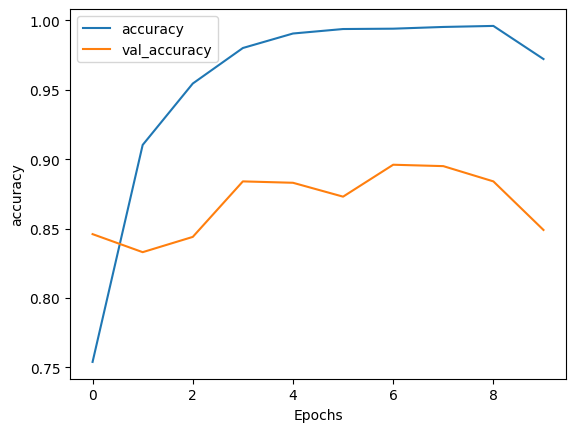

In [17]:
plot_graghs(history, 'accuracy')

### Loss

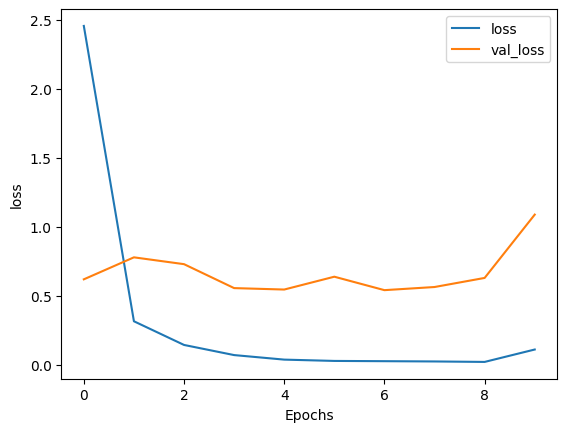

In [18]:
plot_graghs(history, 'loss')

## Model Predictions

In [19]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

label = ['battery', 'cable', 'e_kettle', 'keyboard', 'laptop', 'light_bulb', 'monitor', 'mouse', 'pcb', 'phone', 'printer', 'rice_cooker', 'tv']
for fn in os.listdir('test/test'):
  path = './test/test/' + fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  for i, l in zip(classes[0], label):
    print("{} : {:.2%}".format(l, i))

1/1 [==============================] - 6s 6s/step
monitor_mati.jpg
battery : 0.05%
cable : 2.23%
e_kettle : 0.01%
keyboard : 0.09%
laptop : 62.67%
light_bulb : 0.05%
monitor : 9.98%
mouse : 0.02%
pcb : 0.01%
phone : 0.01%
printer : 0.07%
rice_cooker : 0.01%
tv : 24.80%
1/1 [==============================] - 0s 35ms/step
laptop_0,5_mati.jpg
battery : 0.00%
cable : 0.00%
e_kettle : 0.00%
keyboard : 99.52%
laptop : 0.02%
light_bulb : 0.00%
monitor : 0.43%
mouse : 0.00%
pcb : 0.04%
phone : 0.00%
printer : 0.00%
rice_cooker : 0.00%
tv : 0.00%
1/1 [==============================] - 0s 32ms/step
phone_hidup.jpg
battery : 0.00%
cable : 0.00%
e_kettle : 0.00%
keyboard : 0.03%
laptop : 0.00%
light_bulb : 0.00%
monitor : 0.00%
mouse : 0.00%
pcb : 99.97%
phone : 0.00%
printer : 0.00%
rice_cooker : 0.00%
tv : 0.00%
1/1 [==============================] - 0s 33ms/step
monitor_hidup.jpg
battery : 0.00%
cable : 0.00%
e_kettle : 0.00%
keyboard : 98.24%
laptop : 0.04%
light_bulb : 0.00%
monitor : 1.71%
m

## Save the Model

In [ ]:
# Save the model
# model.save('e_waste_classifier.h5')